# Project Idea

## Recognizing Iconic Birds of Bangladesh

The goal of this project is to classify 15 different types of iconic birds of Bangladesh which are found around the country. The birds are in the following: <br/>
1. Asian Koel (Kokil)
2. Black Drongo (Finge)
3. Brahminy Kite (Shankh Chil)
4. Common Kingfisher (Machh Ranga)
5. Common Myna (Shalik)
6. House Crow (Pati Kak)
7. House Sparrow (Chorui)
8. Indian Pond Heron (Kani Bok)
9. Little Cormorant (Pankowri)
10. Oriental Magpie-Robin (Doel)
11. Red-vented Bulbul (Bulbul)
12. Rock Pigeon (Payerra)
13. Rose-ringed Parakeet (Tiya Pakhi)
14. Spotted Dove (Telaghughu)
15. White-breasted Waterhen (Dahuk)


# Importing Libraries and Setting up Project Directory

In [1]:
# !pip install -Uqq fastai fastbook nbdev ddgs==9.5.4
!pip install -Uqq fastai fastbook nbdev ddgs

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 35.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.3/70.3 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 102.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 91.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 68.8 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from fastai import *
from fastbook import *
from fastai.vision.all import *

In [4]:
%cd /content/drive/MyDrive/2025_ALL_Master_Course_Works/ALL_DL_CV/CV-Project-2_BD-Iconic-Bird-Recognizer

/content/drive/MyDrive/2025_ALL_Master_Course_Works/ALL_DL_CV/CV-Project-2_BD-Iconic-Bird-Recognizer


# Download Images from Browser

## Download Images Using Bing

It's the most efficient and easiest way to scrape images right now to me

In [5]:
bird_categories = [
    "Asian Koel (Kokil)",
    "Black Drongo (Finge)",
    "Brahminy Kite (Shankh Chil)",
    "Common Kingfisher (Machh Ranga)",
    "Common Myna (Shalik)",
    "House Crow (Pati Kak)",
    "House Sparrow (Chorui)",
    "Indian Pond Heron (Kani Bok)",
    "Little Cormorant (Pankowri)",
    "Oriental Magpie-Robin (Doel)",
    "Red-vented Bulbul (Bulbul)",
    "Rock Pigeon (Payerra)",
    "Rose-ringed Parakeet (Tiya Pakhi)",
    "Spotted Dove (Telaghughu)",
    "White-breasted Waterhen (Dahuk)"
]

len(bird_categories)

15

In [6]:
!pip install bing-image-downloader

In [8]:
from bing_image_downloader import downloader

# created "dataset" folder to store data
# downloading 150 image per category/label

for label in bird_categories:
    downloader.download(label, limit=150, output_dir='dataset', adult_filter_off=True, force_replace=False, timeout=60)

Streaming output truncated to the last 5000 lines.

[%] Downloading Image #26 from https://thumbs.dreamstime.com/z/photo-rock-pigeon-243343446.jpg
[%] File Downloaded !

[%] Downloading Image #27 from https://images.squarespace-cdn.com/content/v1/5e121baa8aa5803c29b93200/1600308882416-9FBFA1SF1T2774HP4KVR/DAN_BROWN_ROPI_SCR_co_CA_2011-02-22_25_DLB_0827.jpg
[%] File Downloaded !

[%] Downloading Image #28 from https://media.audubon.org/nas_birdapi/rock-pigeon_004_fall_poland_hederabaltica_flickrcc-by-sa-2.0_adult-variant.jpg?height=944&amp;auto=webp&amp;quality=90&amp;fit=bounds&amp;disable=upscale
[%] File Downloaded !

[%] Downloading Image #29 from https://media.audubon.org/nas_birdapi/rock-pigeon_007_fall_poland_hederabaltica_flickrcc-by-sa-2.0_adult-variant.jpg?height=944&amp;auto=webp&amp;quality=90&amp;fit=bounds&amp;disable=upscale
[%] File Downloaded !

[%] Downloading Image #30 from https://c8.alamy.com/comp/ANFRGJ/rock-pigeon-canada-ANFRGJ.jpg
[%] File Downloaded !

[%] Downl

In [9]:
# - get_image_files(): This is a utility from the fastai library that scans a directory and returns a list of image file paths
# - data_path: This is the root folder pointing to folder path, in this case, it is pointing to "dataset" folder where all folders of cap labels are stored.
data_path = "dataset"
image_counts = get_image_files(data_path)
image_counts

(#2200) [Path('dataset/Asian Koel (Kokil)/Image_1.jpg'),Path('dataset/Asian Koel (Kokil)/Image_2.jpg'),Path('dataset/Asian Koel (Kokil)/Image_3.jpg'),Path('dataset/Asian Koel (Kokil)/Image_4.jpg'),Path('dataset/Asian Koel (Kokil)/Image_5.jpg'),Path('dataset/Asian Koel (Kokil)/Image_6.jpg'),Path('dataset/Asian Koel (Kokil)/Image_7.jpg'),Path('dataset/Asian Koel (Kokil)/Image_8.jpg'),Path('dataset/Asian Koel (Kokil)/Image_9.jpg'),Path('dataset/Asian Koel (Kokil)/Image_10.jpg'),Path('dataset/Asian Koel (Kokil)/Image_11.jpg'),Path('dataset/Asian Koel (Kokil)/Image_12.jpg'),Path('dataset/Asian Koel (Kokil)/Image_13.jpg'),Path('dataset/Asian Koel (Kokil)/Image_14.jpg'),Path('dataset/Asian Koel (Kokil)/Image_15.jpg'),Path('dataset/Asian Koel (Kokil)/Image_16.jpg'),Path('dataset/Asian Koel (Kokil)/Image_17.JPG'),Path('dataset/Asian Koel (Kokil)/Image_18.jpg'),Path('dataset/Asian Koel (Kokil)/Image_19.jpg'),Path('dataset/Asian Koel (Kokil)/Image_20.jpg')...]

In [10]:
# finding images that can't be opened and putting them on failed
failed = verify_images(image_counts)
failed

(#0) []

In [11]:
# - failed: This should be a list-like object containing paths to files you want to delete—typically corrupted or invalid image files.
# - .map(...): This is FastAI’s version of Python’s map(), but applied to its L class (a smarter list). It applies a function to each item in the list.
# - Path.unlink: This deletes a file from disk. It’s like calling .remove() or os.remove() but cleaner with Pathlib.

failed.map(Path.unlink)

(#0) []

In [12]:
# images after cleaning
get_image_files(data_path)

(#2200) [Path('dataset/Asian Koel (Kokil)/Image_1.jpg'),Path('dataset/Asian Koel (Kokil)/Image_2.jpg'),Path('dataset/Asian Koel (Kokil)/Image_3.jpg'),Path('dataset/Asian Koel (Kokil)/Image_4.jpg'),Path('dataset/Asian Koel (Kokil)/Image_5.jpg'),Path('dataset/Asian Koel (Kokil)/Image_6.jpg'),Path('dataset/Asian Koel (Kokil)/Image_7.jpg'),Path('dataset/Asian Koel (Kokil)/Image_8.jpg'),Path('dataset/Asian Koel (Kokil)/Image_9.jpg'),Path('dataset/Asian Koel (Kokil)/Image_10.jpg'),Path('dataset/Asian Koel (Kokil)/Image_11.jpg'),Path('dataset/Asian Koel (Kokil)/Image_12.jpg'),Path('dataset/Asian Koel (Kokil)/Image_13.jpg'),Path('dataset/Asian Koel (Kokil)/Image_14.jpg'),Path('dataset/Asian Koel (Kokil)/Image_15.jpg'),Path('dataset/Asian Koel (Kokil)/Image_16.jpg'),Path('dataset/Asian Koel (Kokil)/Image_17.JPG'),Path('dataset/Asian Koel (Kokil)/Image_18.jpg'),Path('dataset/Asian Koel (Kokil)/Image_19.jpg'),Path('dataset/Asian Koel (Kokil)/Image_20.jpg')...]

In [13]:
# showing total file counts for each category
# Path to main data folder
data_folder = '/content/drive/MyDrive/2025_ALL_Master_Course_Works/ALL_DL_CV/CV-Project-2_BD-Iconic-Bird-Recognizer/dataset'

# Dictionary to store file counts
file_counts = {}

# Loop through each item in the data folder
for subfolder in os.listdir(data_folder):
    subfolder_path = os.path.join(data_folder, subfolder)

    # Check if it's a directory
    if os.path.isdir(subfolder_path):
        # Count only files (not subdirectories)
        files = [f for f in os.listdir(subfolder_path) if os.path.isfile(os.path.join(subfolder_path, f))]
        file_counts[subfolder] = len(files)

# Display the results
for category, count in file_counts.items():
    print(f"{category}: {count} files")

Asian Koel (Kokil): 150 files
Black Drongo (Finge): 150 files
Brahminy Kite (Shankh Chil): 150 files
Common Kingfisher (Machh Ranga): 150 files
Common Myna (Shalik): 150 files
House Crow (Pati Kak): 150 files
House Sparrow (Chorui): 150 files
Indian Pond Heron (Kani Bok): 150 files
Little Cormorant (Pankowri): 150 files
Oriental Magpie-Robin (Doel): 150 files
Red-vented Bulbul (Bulbul): 150 files
Rock Pigeon (Payerra): 150 files
Rose-ringed Parakeet (Tiya Pakhi): 150 files
Spotted Dove (Telaghughu): 150 files
White-breasted Waterhen (Dahuk): 150 files


# Loading data to Data Loader

In [ ]:
doc(get_image_files)

In [14]:
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,                        # get_image_files returns a list of all images in that path recursively by default
    splitter=RandomSplitter(valid_pct=0.1, seed=42),  # getting 90-10 train-validation split
    get_y=parent_label,                               # taking the folder name as labels
    item_tfms=Resize(128))                            # resizing to get the image of same shape

In [15]:
bs = 8 # batch size
data_path = "dataset"
dls = dblock.dataloaders(data_path, bs=bs)             # setting up batch size for efficient GPU use

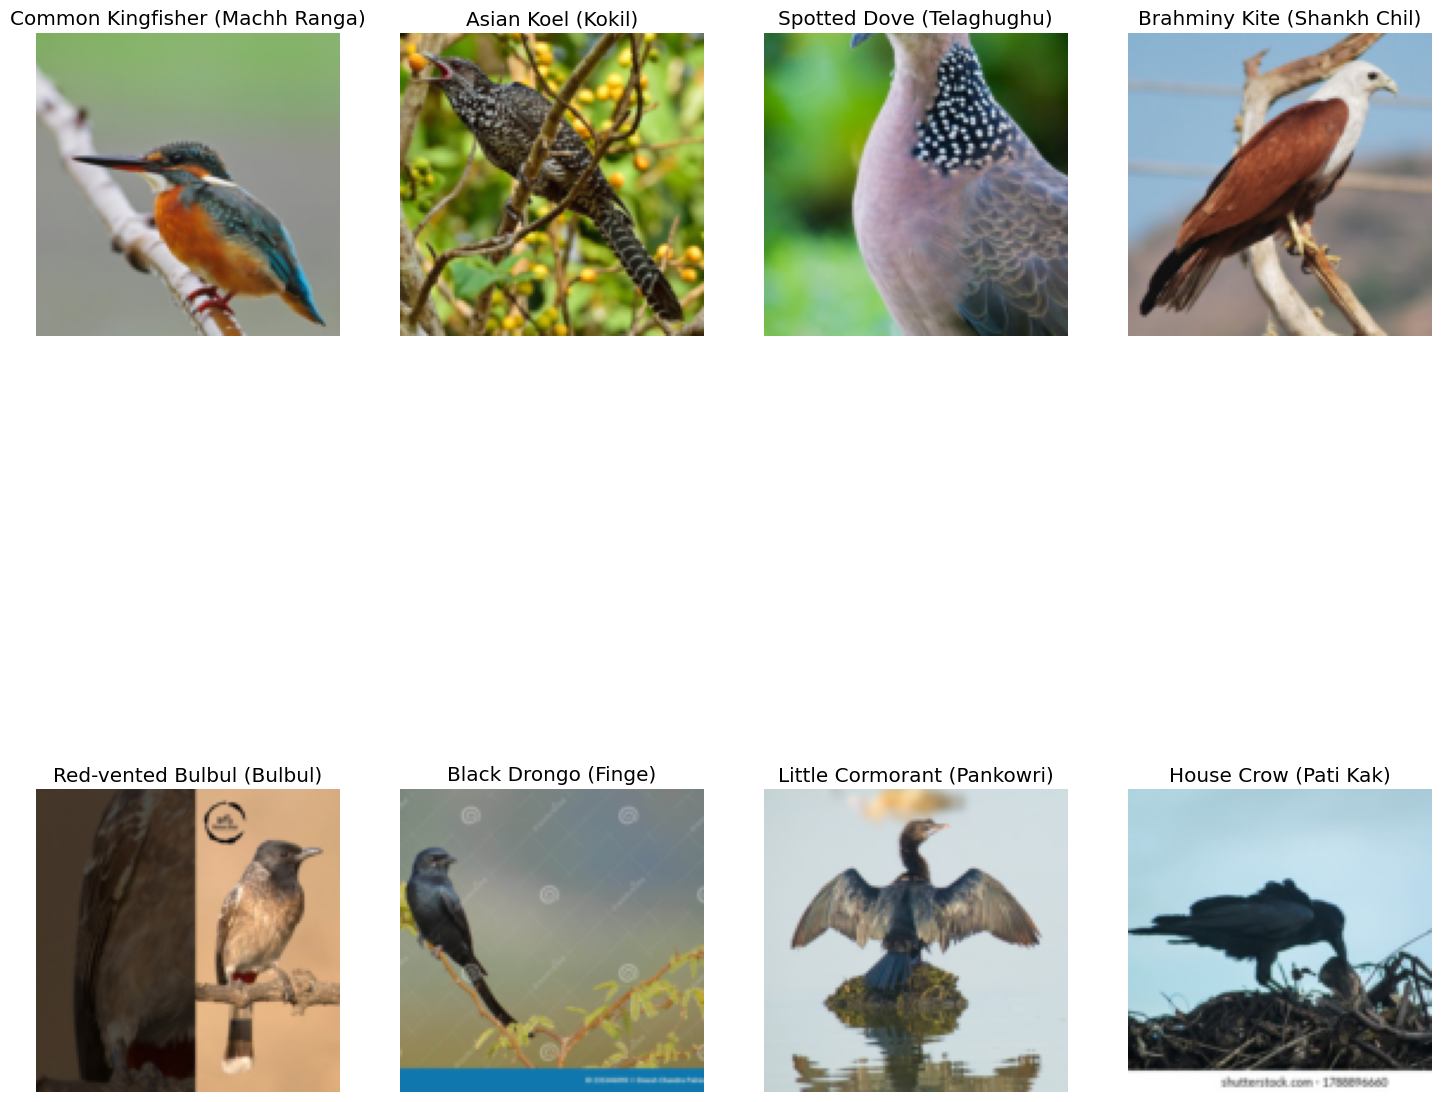

In [37]:
dls.train.show_batch(max_n=8, nrows=2, figsize=(18,18))

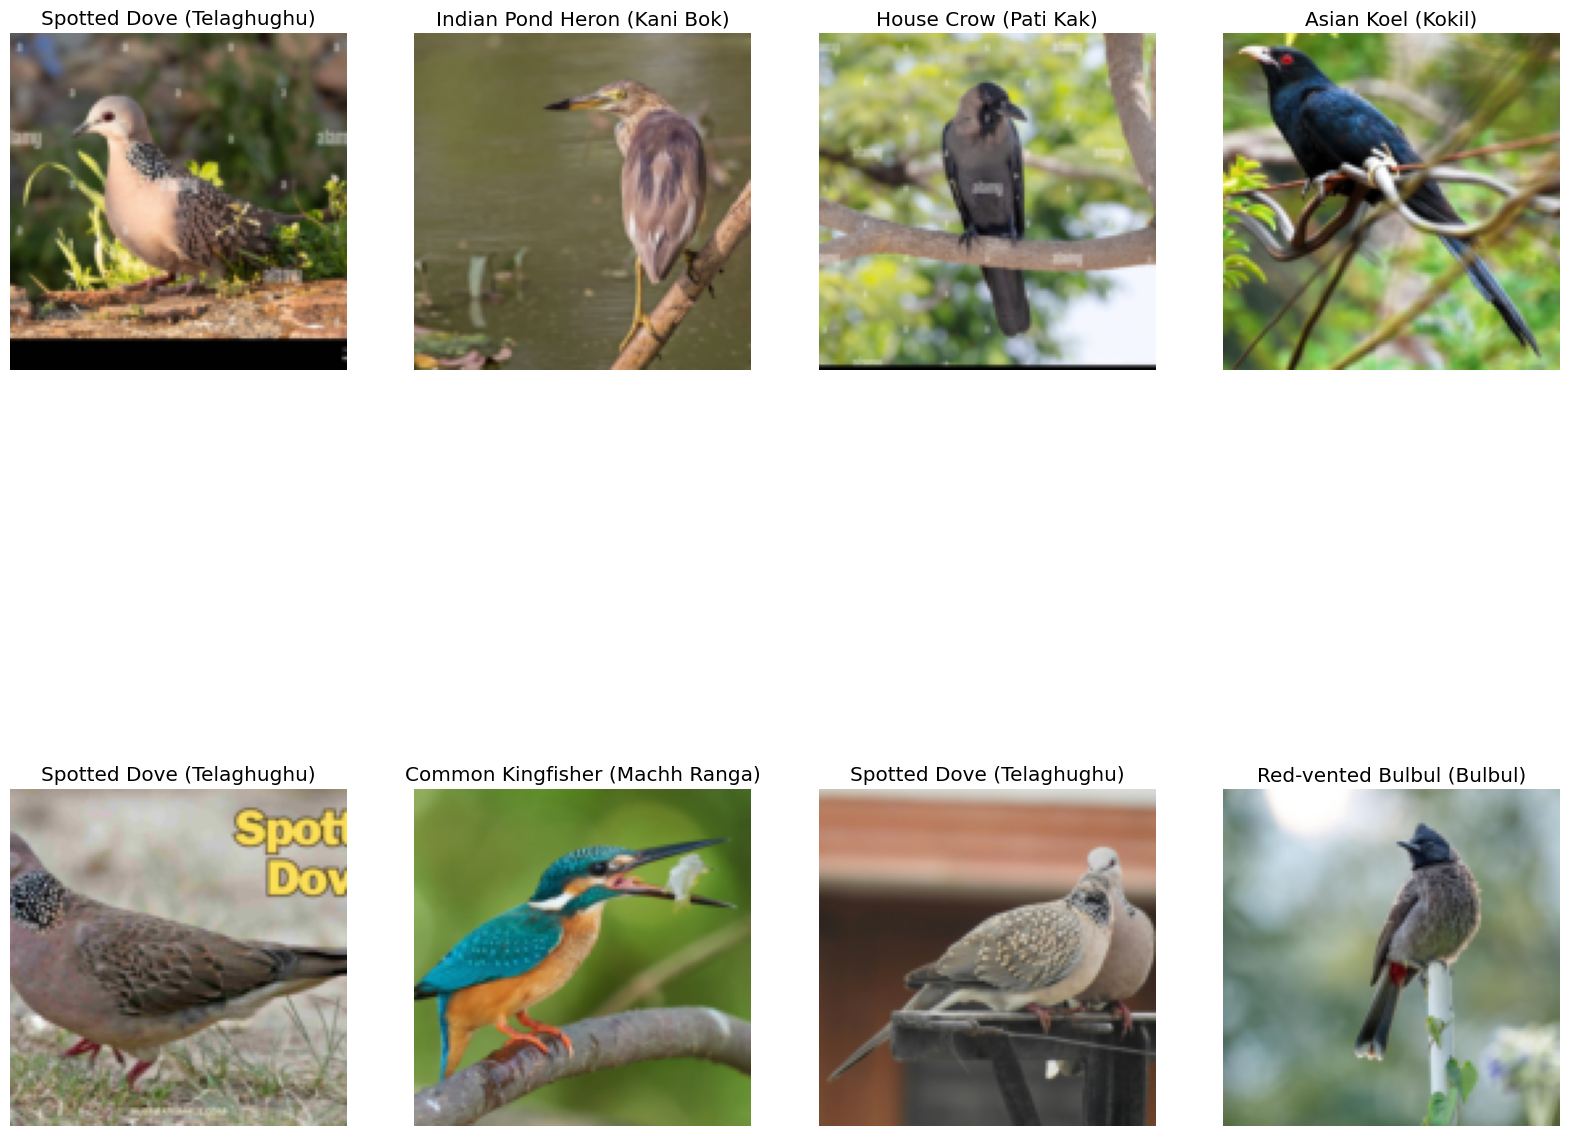

In [41]:
dls.valid.show_batch(max_n=8, nrows=2, figsize=(20,18))